# Метод главных компонент

### Алгоритм PCA

Дана матрица данных $D$ и коэффициент $\alpha$:
1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;
2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;
3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;
4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;
6. вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;
7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;
8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;
9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

Реализуйте алгоритм для первых двух главных компонент. Найдите $\lambda_1$, $\lambda_2$ и $u_1$, $u_2$. Спроецируйте данные на плоскость образуемую этими векторами, визуализируйте полученные результаты c метками классов. Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.

В качестве данных возьмите изображения с рукописными цифрами.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

data = load_iris()
x, y = data['data'], data['target']

In [19]:
def custom_PCA(D, a):
    Z = (D[:,0] - D[:,0].mean(), D[:,1] - D[:,1].mean(), D[:,2] - D[:,2].mean(), D[:,3] - D[:,3].mean())
    K = np.cov(Z)
    L, U = np.linalg.eig(K)
    fr = sum(L[:a])/sum(L)
    print('доля общей дисперсии: %f' %fr)
    U = U[:,:a]
    return [np.dot(U.transpose(), Z), L]

доля общей дисперсии: 0.977685


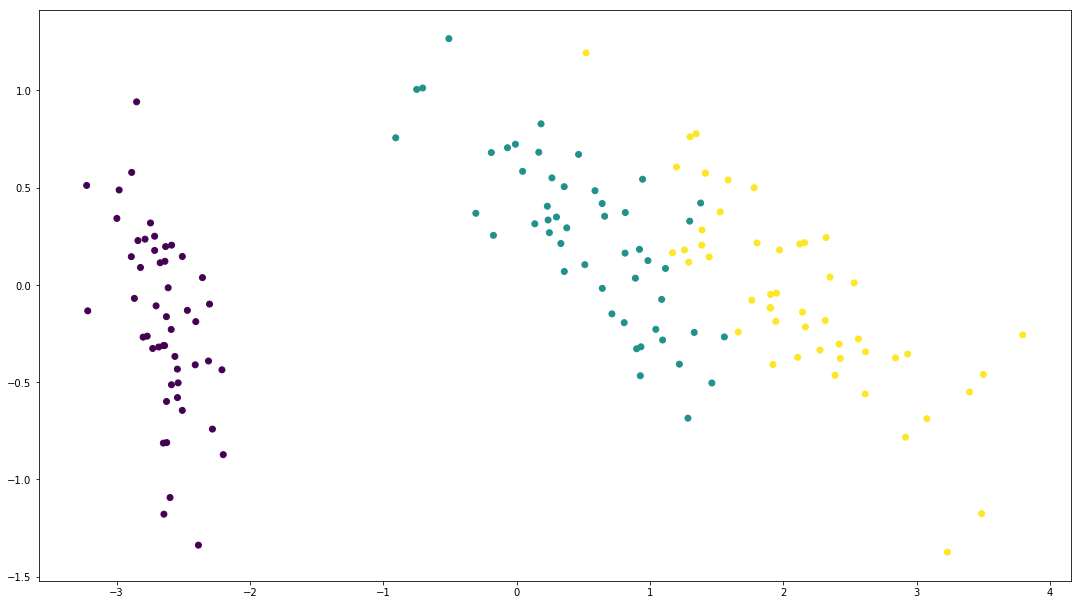

In [20]:
custom_PCA_result = custom_PCA(x, 2)
plt.figure()
plt.scatter(custom_PCA_result[0][0], custom_PCA_result[0][1] ,c=y)
plt.gcf().set_size_inches(18.5, 10.5)

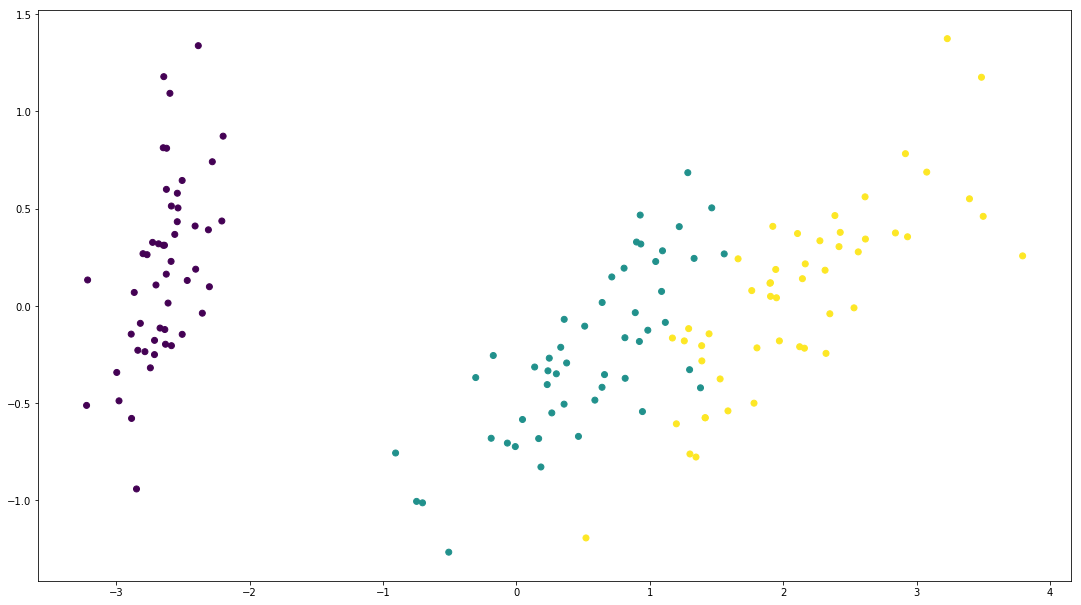

In [14]:
from sklearn.decomposition import PCA

PCA_result = PCA(n_components=2, random_state=0).fit_transform(x)
plt.figure()
plt.scatter(PCA_result[:,0], PCA_result[:,1], c=y)
plt.gcf().set_size_inches(18.5, 10.5)

На основе полученных собственных значений ковариационной матриы $K$ постройте график зависимости покрываемой дисперсии трансформированных данных от количества главных компонент.

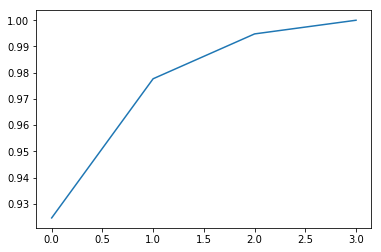

In [30]:
list_value = [sum(custom_PCA_result[1][:i]) / sum(custom_PCA_result[1]) for i in range(1,5)]
plt.plot(list_value)
plt.show()

# Интерпретация компонент
## Корреляция с исходными признаками
Главные компоненты являются линейными кобинациями исходных признаков. В этой связи необходимо оценить связь каждой компоненты с исходными признаками.

Рассчет взаимосвязи будем проводить с помощью корреляции Пирсона:

\begin{equation}
r_{jk} = \frac{\sum_{i=1}^n (x_{ij} - \bar{x}_j) (x_{ik}' - \bar{x}_k')}{\sqrt{\sum_{i=1}^n (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^n (x_{ik}' - \bar{x}_k')^2}}
\end{equation}

где
$\bar{x}_j$ - среднее значение $j$-го признака,
$\bar{x}_k'$ - среднее значение проекции на $k$-ю главную компоненту,
$n$ - количество объектов.

Отметим, что корреляция Пирсона изменяется от $-1$ до $+1$. Она равна $0$ в случае, когда величины независимы, и $\pm 1$, если они линейно зависимы.

Определите по коэффициентам корреляции, какие признаки в какую компоненту вошли.

In [52]:
def custom_pearson(x, y):
    n = len(x)
    sum_x = float(sum(x))
    sum_y = float(sum(y))
    sum_x_sq = sum(map(lambda x: pow(x, 2), x))
    sum_y_sq = sum(map(lambda x: pow(x, 2), y))
    psum = sum(map(lambda x, y: x * y, x, y))
    num = psum - (sum_x * sum_y/n)
    den = pow((sum_x_sq - pow(sum_x, 2) / n) * (sum_y_sq - pow(sum_y, 2) / n), 0.5)
    if den == 0: return 0
    return num / den

In [66]:
for index in range(0,4):
    print(f'Корреляция данных с исходными для стобца {index}: {round(custom_pearson(custom_PCA_result[0][0], x[:,index]), 3)}, {round(custom_pearson(custom_PCA_result[0][1], x[:,index]), 3)}')

Корреляция данных с исходными для стобца 0: 0.897, -0.391
Корреляция данных с исходными для стобца 1: -0.399, -0.825
Корреляция данных с исходными для стобца 2: 0.998, 0.048
Корреляция данных с исходными для стобца 3: 0.967, 0.049


## Работу выполнил
---
Студент группы **РИМ-181226**

Кабанов Евгений Алексеевич